## Linear Classification in Python
### Ben Albrecht
##### Part I. Introduction
Consider a linearly separable dataset $(\overrightarrow{x_1}, y_1),...,(\overrightarrow{x_n}, y_n)$. Where $y_i$ is the target and $y_i \in \{0, 1\}$ and the vectors $\overrightarrow{x_i}$ are two-dimensional. Suppose we normalize our dataset between 0 and 1 so that the vectors can be visualized within the square $[0,1]\times[0,1]$.

A common topic in machine learning concerns classification with linearly separable data. A common approach is the maximal margin classifier or support vector machine (SVM). An SVM takes training data and aims to find a hyperplane with the largest margin between itself and the separate classes of training data. By maximizing the margin between the hyperplane and the two classes, an SVM can predict the class of testing data by seeing on which side of the hyperplane the data lies. In this notebook, we will aim to approximate the results of the maximal margin classifier, or support vector machine (SVM) with combinations of weighted linear cuts.
##### Part II. Classification Strategy
We will aim to get the same results as an SVM by generating linear cuts (or hyperplanes) in the data and weighting them by their error. By weighting them in this way, we penalize cuts that misclassify data. First we will generate a series of $k$ hyperplanes:
$$
x_2 = m_i * x_1 + b_i
$$
The algorithm will then classify data based on which side of the hyperplane they lie on within the feature space. The number of misclassified vectors for each hyperplane will equal its error which will be used to compute the weights:
$$
w_i = \frac{1}{error}
$$
Then, we will calculate a weighted sum of each of the hyperplanes to use as our final classification rule:
$$
x_2 = \hat{m} * x_1 + \hat{b}
$$
Where,
$$
\hat{m} = \frac{w_1 m_1 + w_2 m_2 + ... + w_k m_k}{w_1 + w_2 + ... + w_n}, \hat{b} = \frac{w_1 b_1 + w_2 b_2 + ... + w_k b_k}{w_1 + w_2 + ... + w_n}
$$
##### Part II. Data Generation
Let's begin by generating a datset. First, we'll import all of the libraries we plan to use in this notebook. Note that the data generation, visualization, and weighted linear hyperplane functions and classes used in this document are located in wtd_planes.py.

In [27]:
# Importing necessary libraries.

import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

# Python file with weighted planes / cuts functions and classes.
import wtd_planes

We'll now use wtd_planes.py to generate our data. 

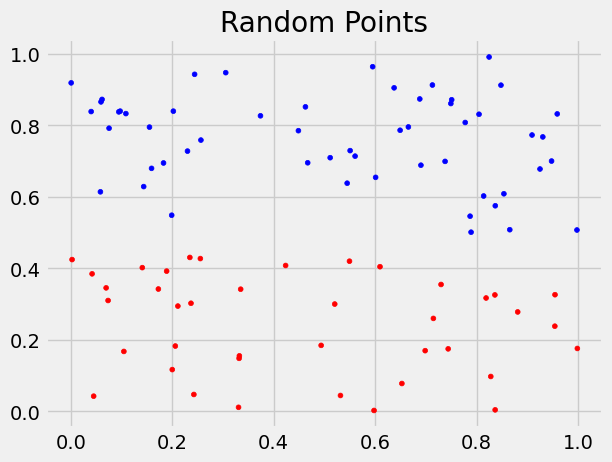

In [28]:
# Create instance of data class.
data = wtd_planes.data_class()

# Generate data.
data.generate_data()

# Visualize dataset.
data.visualize()

##### Part III. Model Classification
Now we'll use the weighted linear model to classify our data. First, we'll need to split our dataset into a training set and a testing set.

In [29]:
# Split into test / train
X, y = data.df.iloc[:, 0:2], data.df.iloc[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train['y'] = y_train


# Define and fit model
model = wtd_planes.wtd_model(data=X_train, iter=1000)
model.fit()

We can now examine the performance of our model with the testing set.

In [30]:
# Predict with training data.
y_pred = model.test_pred(X_test)
error = model.test_error(y_pred, y_test)

no_error = sum(y_pred != y_test)

print("Number of misclassified data: ", no_error)
print("The misclassification error of the model is: ", error)

Number of misclassified data:  1
The misclassification error of the model is:  0.02127659574468085


Our model misclassified 1 data point with an error of $2.1%$. This performance isn't terrible considering that the model was only trained on one sample of data. Let's visualize the hyperplane alongside the testing data.

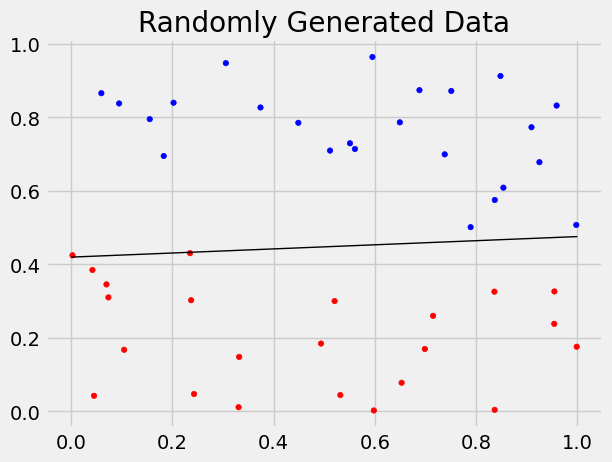

In [31]:
test_data = X_test
test_data['y'] = y_test

colors = ['red', 'blue']
plt.scatter(test_data[0], test_data[1],
            c=test_data['y'].apply(lambda x: colors[x]),s=15)


xx = np.linspace(0,1)
yy = model.m * xx + model.b
plt.plot(xx,yy,c='k', lw=1)

plt.title('Randomly Generated Data')
plt.show()

##### Part IV. Comparison with SVM
We'll now compare our results with the maximal margin classifier, or support vector machine.

In [32]:
X_train.drop('y', axis=1, inplace=True)
X_test.drop('y', axis=1, inplace=True)

# Define and fit linear SVM.
svm_model = svm.SVC(kernel='linear')

svm_model.fit(X_train, y_train)


# Predict with training data.
predictions = svm_model.predict(X_test)
accuracy = svm_model.score(X_test, y_test)
print('Misclassification error: ', (1 - accuracy))

Misclassification error:  0.0


Our SVM performed even better with the data! Let's now visualize the support vector machine hyperplane and margin alongside our training data. 

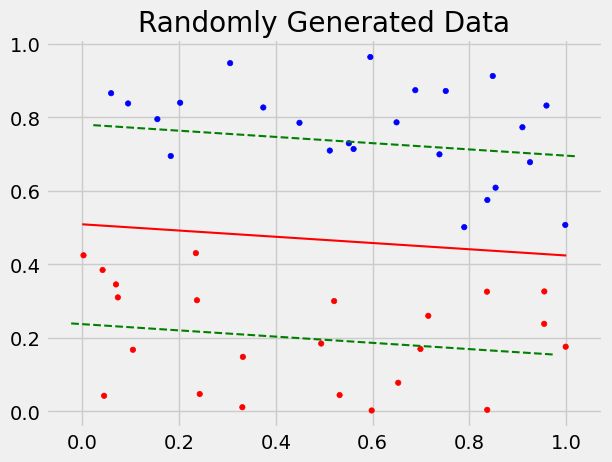

In [46]:
# Make scatterplot with data.
test_data['y'] = y_test
colors = ['red', 'blue']
plt.scatter(test_data[0], test_data[1],
            c=test_data['y'].apply(lambda x: colors[x]),s=15)


# Plot SVM hyperplane
w = svm_model.coef_[0]
b = svm_model.intercept_[0]
xx = np.linspace(0,1)
svm_m = -(w[0]/w[1])
svm_b = - b/w[1]
yy_svm = svm_m * xx + svm_b
plt.plot(xx,yy_svm,c='r', lw=1.5)


# Plot SVM margin.
w_hat = w / (np.sqrt(np.sum(w**2)))
margin = 1 / (np.sqrt(np.sum(w**2)))
dec_boundary_pts = np.array(list(zip(xx, yy_svm)))
points_above = dec_boundary_pts + w_hat * margin
points_below = dec_boundary_pts - w_hat * margin
plt.plot(points_above[:,0],
         points_above[:,1],
         'g--', lw=1.5)
plt.plot(points_below[:,0],
         points_below[:,1],
         'g--', lw=1.5)


plt.title('Randomly Generated Data')
plt.show()

Let's now see the difference between the SVM hyperplane and the weighted model hyperplane. This time we will omit the SVM margin.

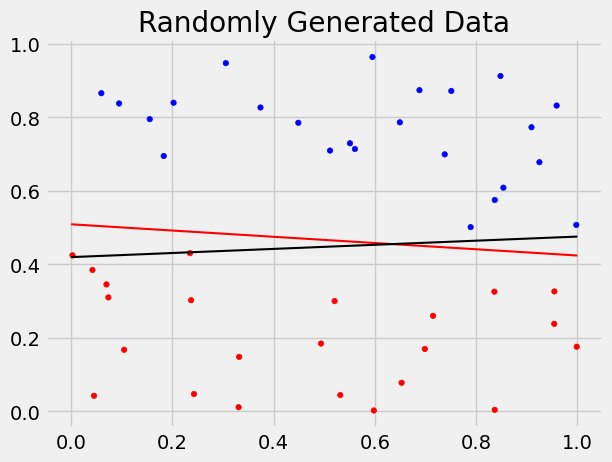

In [47]:
# Make scatterplot with data.
test_data['y'] = y_test
colors = ['red', 'blue']
plt.scatter(test_data[0], test_data[1],
            c=test_data['y'].apply(lambda x: colors[x]),s=15)


# Plot SVM hyperplane
w = svm_model.coef_[0]
b = svm_model.intercept_[0]
xx = np.linspace(0,1)
svm_m = -(w[0]/w[1])
svm_b = - b/w[1]
yy_svm = svm_m * xx + svm_b
plt.plot(xx,yy_svm,c='r', lw=1.5)

# Weighted model hyperplane.
yy = model.m * xx + model.b
plt.plot(xx,yy,c='k', lw=1.5)

plt.title('Randomly Generated Data')
plt.show()

##### Part V. Conclusion
We have seen that our model can perform almost as well as an SVM using a linearly separable dataset. Intuitively this makes sense, the algorithm for the weighted hyperplane seeks to "maximize the margin" by penalizing lines that misclassify data. Future work on the weighted hyperplane may include utilizing different samples to train the dataset, or looking for different ways to penalize the hyperplane for misclassification during training.